In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
sns.set_palette("pastel")

In [3]:
df = pd.read_csv('datasetof.csv') 

print(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [4]:
# Verificamos nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Eliminar columna innecesaria si existe
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Verificamos duplicados
print("\nNúmero de duplicados:", df.duplicated().sum())

# Eliminar duplicados si los hay
df = df.drop_duplicates()

# Verificar valores únicos en las columnas categóricas
print("\nValores únicos en track_genre:", df['track_genre'].nunique())
print(df['track_genre'].value_counts().head(10))


Valores nulos por columna:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Número de duplicados: 450

Valores únicos en track_genre: 114
track_genre
acoustic       1000
emo            1000
rock-n-roll    1000
reggaeton      1000
disco          1000
r-n-b          1000
punk-rock      1000
pagode         1000
electronic     1000
mpb            1000
Name: count, dtype: int64


In [5]:
#Tratamiento de nulos
for col in ['artists', 'album_name', 'track_name']:
    df[col] = df[col].fillna(f"Missing_{col}")
    print(df.isnull().sum()) 

track_id            0
artists             0
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
track_id            0
artists             0
album_name          0
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
track_id            0
artists             0
album_name          0
track_name          0
popula

c:\Users\Administrador\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


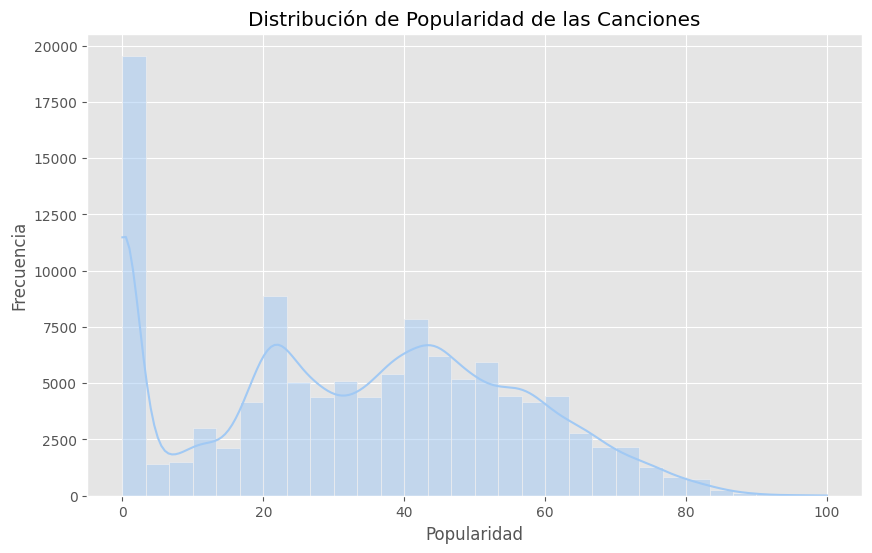


Estadísticas de popularidad:
count    113550.000000
mean         33.324139
std          22.283976
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64


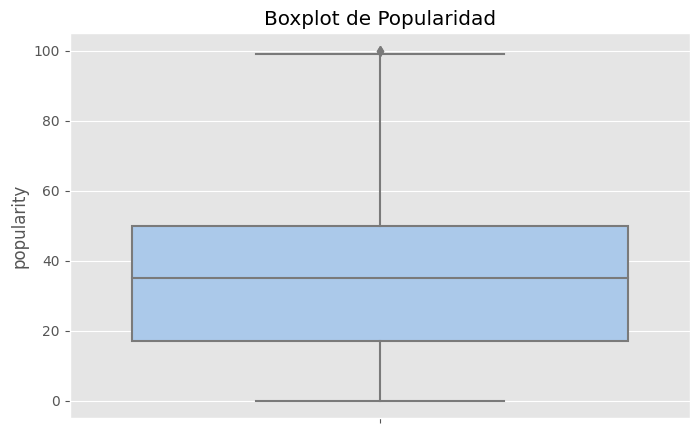

In [6]:
# Análisis de la distribución de popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribución de Popularidad de las Canciones')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas de popularity
print("\nEstadísticas de popularidad:")
print(df['popularity'].describe())

# Boxplot de popularity
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['popularity'])
plt.title('Boxplot de Popularidad')
plt.show()

Haciendo un análisis de popularidad vemos que en la distribución de popularidad presenta una media de entre 33.32 ± 22.28 teniendo moderada variabilidad
Tiene un rango de entre 0 a 100.
Presenta sus cuartiles de:
Q1(25%): 17
Mediana: 35
Q3 (75%): 50

La distribución es ligeramente asimétrica hacia valores bajos, lo cual significa que pocas canciones alcanzan popularidad máxima (100).

En cuanto a las estadísticas de las características musicales tenemos:

La duración promedio está entre unos 228 segundos (3.8 minutos) y su máximo es de 5,237 segundos ( aprox. 87 minutos). Esto da a ver que hay posibles datos atípicos, como canciones de sinfonías.

Con capacidad de baile presenta una distribución relativamente simétrica, lo cual podría indicar que los artistas producen música con diversidad en esta característica. También no hay un sesgo cultural hacia música muy bailable o no bailable. Y El mercado musical abarca todo el espectro de esta característica.

La distribución de popularidad revela un rango amplio pero concentrado pues va de 0 a 100. También el 75% de canciones tienen popularidad menor o igual a 50 y solo canciones excepcionales alcanzan más de 75.

La cola izquierda más larga indica que muchas canciones poco populares y pocos éxitos. 

Por lo cual la popularidad en 'principio no sigue distribución normal y el mercado musical es altamente competitivo.

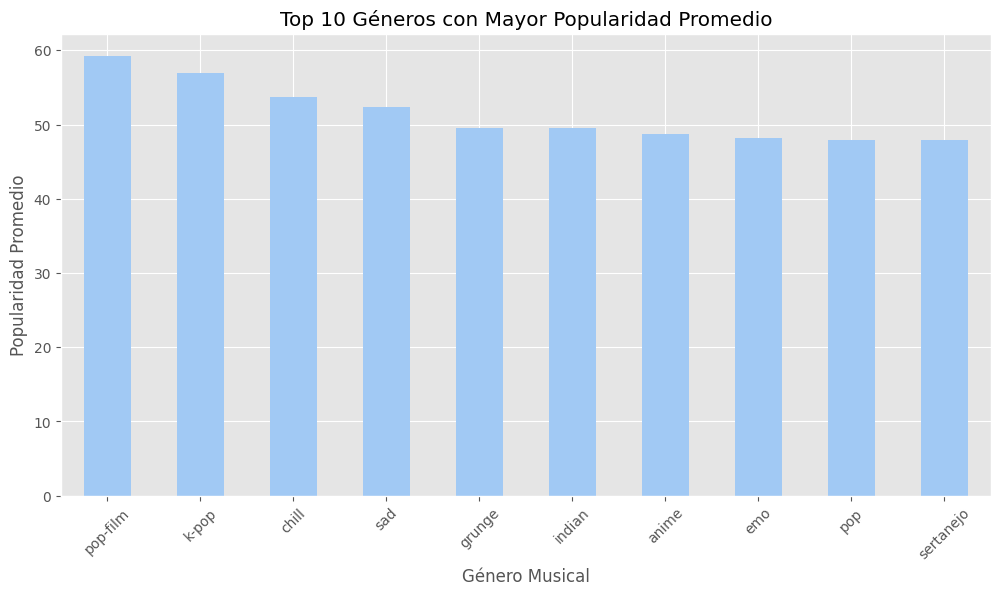

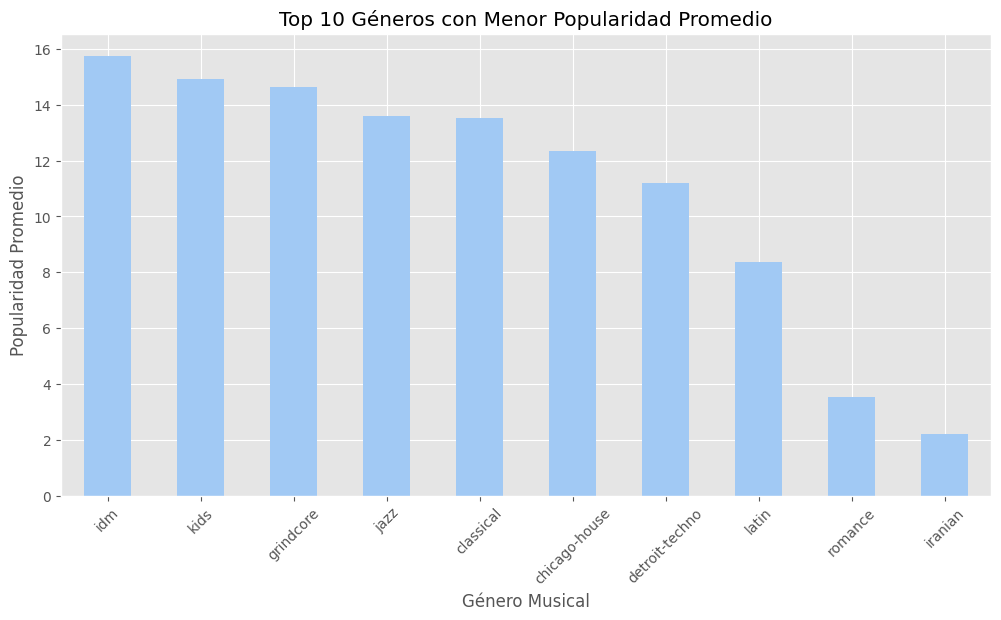

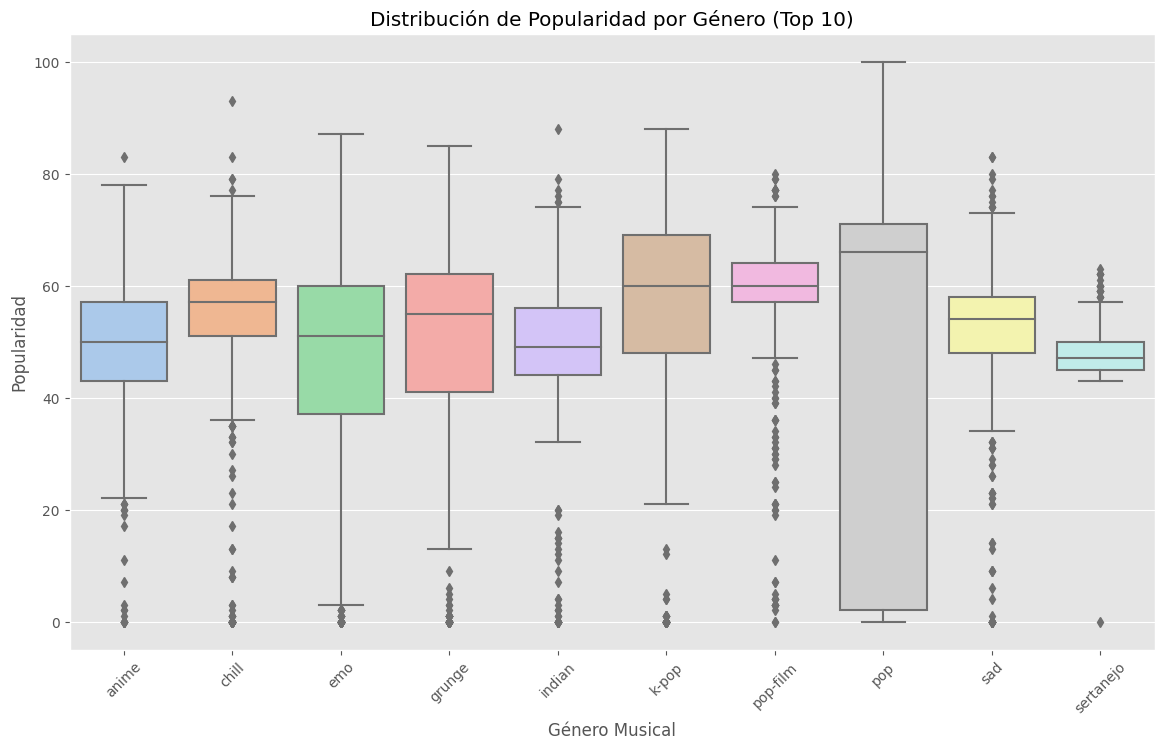

In [7]:
import matplotlib.pyplot as plt
# Popularidad promedio por género
popularity_by_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

# Top 10 géneros más populares
plt.figure(figsize=(12, 6))
popularity_by_genre.head(10).plot(kind='bar')
plt.title('Top 10 Géneros con Mayor Popularidad Promedio')
plt.xlabel('Género Musical')
plt.ylabel('Popularidad Promedio')
plt.xticks(rotation=45)
plt.show()

# Bottom 10 géneros menos populares
plt.figure(figsize=(12, 6))
popularity_by_genre.tail(10).plot(kind='bar')
plt.title('Top 10 Géneros con Menor Popularidad Promedio')
plt.xlabel('Género Musical')
plt.ylabel('Popularidad Promedio')
plt.xticks(rotation=45)
plt.show()

# Distribución de popularidad por género (boxplot para los principales géneros)
top_genres = popularity_by_genre.head(10).index
df_top_genres = df[df['track_genre'].isin(top_genres)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='track_genre', y='popularity', data=df_top_genres)
plt.title('Distribución de Popularidad por Género (Top 10)')
plt.xlabel('Género Musical')
plt.ylabel('Popularidad')
plt.xticks(rotation=45)
plt.show()

Tiene asimetría negativa con un pico entre 35 y 40 y una caída en 60.
Hay una pequeña dificultad para superar este umbral pues las canciones con 0 popularidad posiblemente son muy antiguas o nicho. Y canciones con 100 son los éxitos virales o campañas promocionales.

Matriz de correlación: (14, 14)


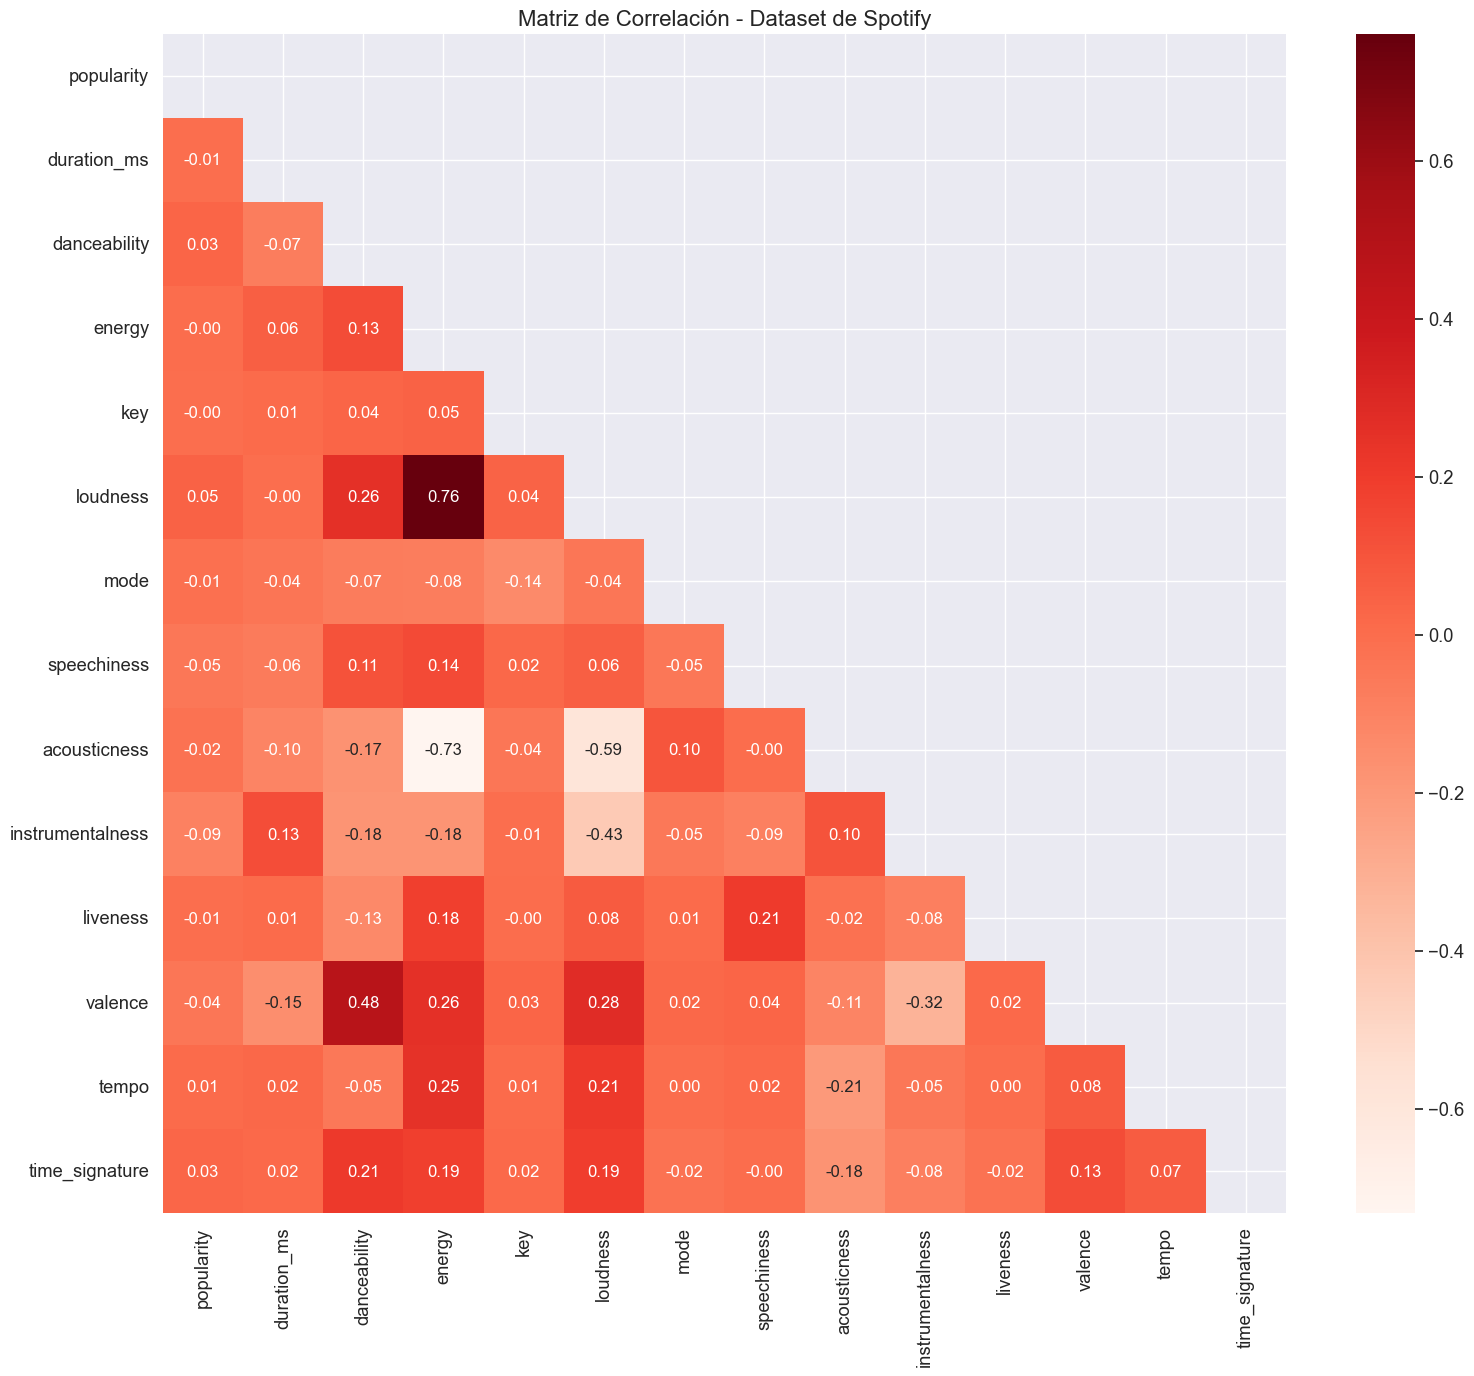

In [8]:
# Calcular la matriz de correlación
spotify_num = df.select_dtypes(include=np.number)

corr = spotify_num.corr()
print("Matriz de correlación:", corr.shape)

# Crear la máscara para ocultar la mitad superior
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Configurar el estilo y mostrar el mapa de calor
sns.set(font_scale=1.2)
plt.figure(figsize=(16, 14))
sns.heatmap(corr, mask=mask, cmap='Reds', annot=True, fmt='.2f', annot_kws={"size": 12}, cbar=True)
plt.title("Matriz de Correlación - Dataset de Spotify", fontsize=16)
plt.tight_layout()
plt.show()

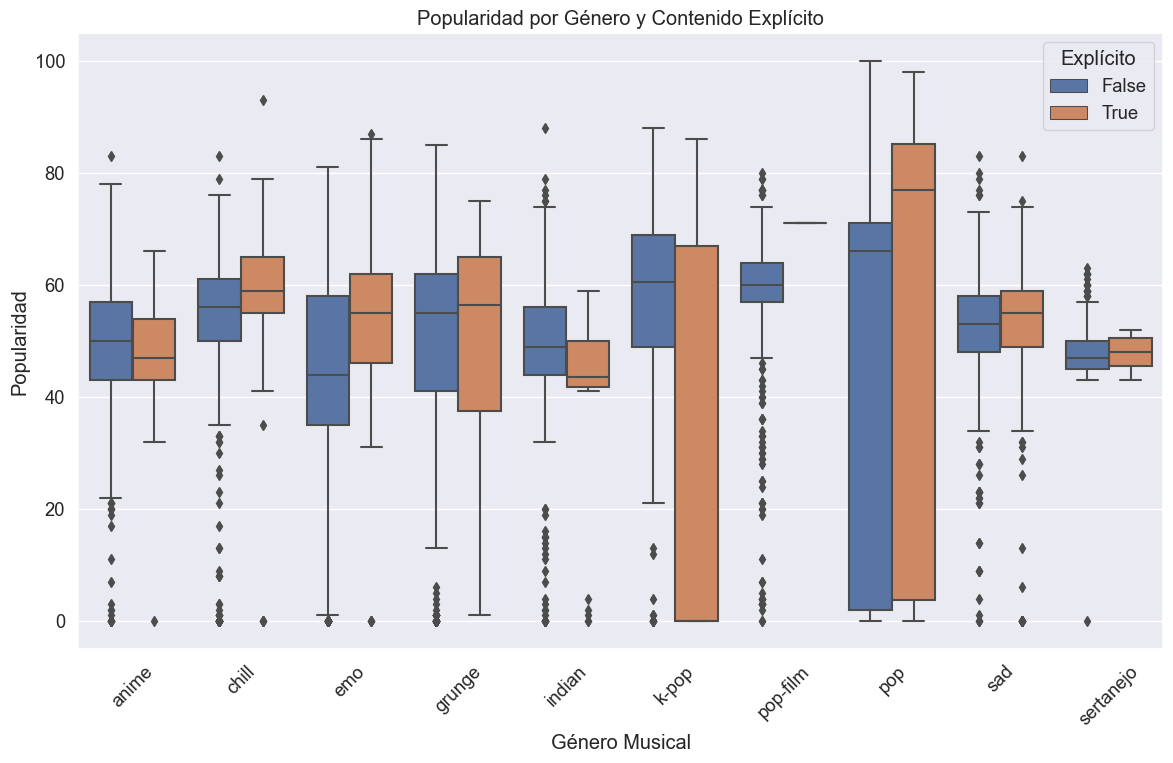

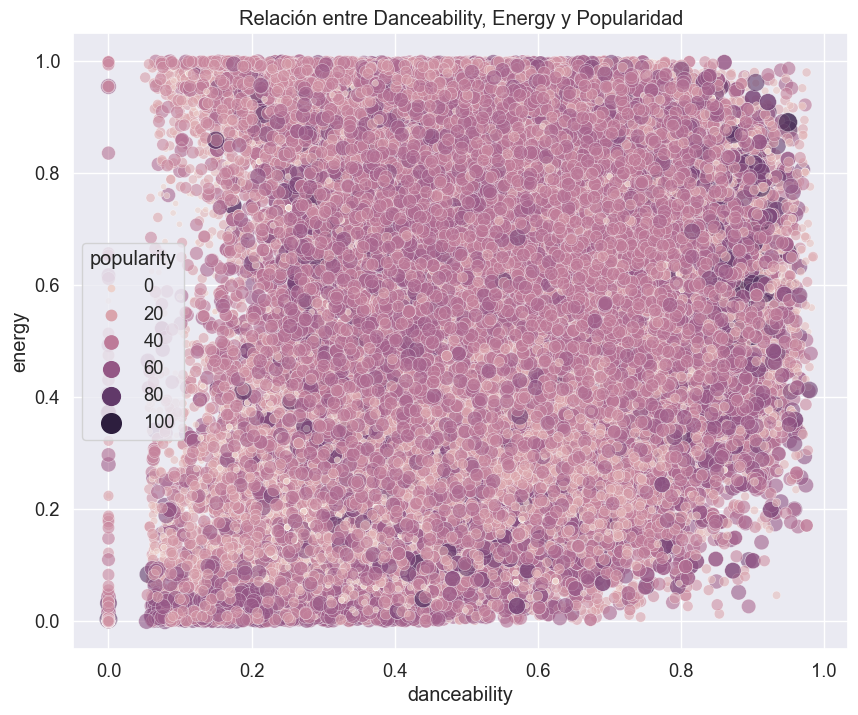

In [9]:
# Popularidad por género y explicit content
plt.figure(figsize=(14, 8))
sns.boxplot(x='track_genre', y='popularity', hue='explicit', 
            data=df[df['track_genre'].isin(top_genres)])
plt.title('Popularidad por Género y Contenido Explícito')
plt.xlabel('Género Musical')
plt.ylabel('Popularidad')
plt.xticks(rotation=45)
plt.legend(title='Explícito')
plt.show()

# Relación entre popularity, danceability y energy
plt.figure(figsize=(10, 8))
sns.scatterplot(x='danceability', y='energy', size='popularity', 
                hue='popularity', data=df, alpha=0.6, sizes=(20, 200))
plt.title('Relación entre Danceability, Energy y Popularidad')
plt.show()

In [10]:
# Resumen de hallazgos
print("\nResumen de hallazgos:")
print(f"- Cantidad total de géneros únicos: {df['track_genre'].nunique()}")
print(f"- Género más popular en promedio: {popularity_by_genre.idxmax()} ({popularity_by_genre.max():.2f})")
print(f"- Género menos popular en promedio: {popularity_by_genre.idxmin()} ({popularity_by_genre.min():.2f})")
print("- Variables más correlacionadas con popularidad:")
print(corr['popularity'].sort_values(ascending=False).head(5))


Resumen de hallazgos:
- Cantidad total de géneros únicos: 114
- Género más popular en promedio: pop-film (59.28)
- Género menos popular en promedio: iranian (2.22)
- Variables más correlacionadas con popularidad:
popularity        1.000000
loudness          0.047371
danceability      0.034412
time_signature    0.030564
tempo             0.012180
Name: popularity, dtype: float64


Concluimos que hay mucha diversidad musical hoy en día pues hay 114 géneros bien representados.
Contiene una distribución balanceada de géneros y una distribución asimétrica de popularidad, lo que sugiere que todos los géneros tienen oportunidad pero pocos alcanzan máxima popularidad.


Este EDA representa la diversidad musical actual. Captura la dinámica competitiva de la industria ofrenciendo oportunidades para descubrir patrones ocultos en ciertos géneros, poder predecir un éxito musical y optimizar recomendaciones

Pero unas limitantes serían que no se considera temporalidad (es decir, evolución histórica). También carece de datos demográficos de oyentes. Contiene métricas de popularidad pueden tener sesgos algorítmicos, lo cual es dificil de analizar.

Y para predicciones futuras se podría tener en cuenta análisis temporal de tendencias, una segmentación por región geográfica y un modelado de factores de éxito.